# Township of Langley, Land and Parcel: data analysis

Building a regression model to predict the *current* price of properties, based on a consolidated list.

# PART 4
#### More info here:
https://data-tol.opendata.arcgis.com/

In [44]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### Import data

In [28]:
dfland = pd.read_csv('land and parcel information\land.csv', index_col=0,
                     dtype={'House': np.object, 'AUC': np.object,
                            'PickUpDay':np.int8, 'LotSize_sq_ft':np.float64},
                     low_memory=False)

In [29]:
dfland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20996 entries, 0 to 20995
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ParcelKey                        20996 non-null  int64  
 1   Section                          20996 non-null  object 
 2   ALR                              20996 non-null  object 
 3   Board_of_Variance                20996 non-null  object 
 4   Burning                          20996 non-null  object 
 5   Development_Permit_Area          20996 non-null  object 
 6   Heritage                         20996 non-null  object 
 7   Heritage_Conserve_Area           20996 non-null  object 
 8   Recycling_StartYear              20996 non-null  object 
 9   Recycling_Units_BlueBox          20996 non-null  int64  
 10  Recycling_Units_Toter            20996 non-null  int64  
 11  Secondary_Suite_Details          20996 non-null  object 
 12  Secondary_Suite_To

In [30]:
# Just use the first THREE characters of the Postal Code

dfland['Postal_Code'] = dfland['Postal_Code'].str[:3]
dfland['Postal_Code'].value_counts()

V1M    6429
V3A    4828
V4W    3591
V2Y    3086
V2Z    3036
V0X      12
VIM      12
V1A       2
Name: Postal_Code, dtype: int64

In [31]:
dfland['Section'].value_counts()

36         3160
No_Data    2465
35         2081
19         1578
15         1498
25         1256
31         1089
6          1020
26          893
20          848
27          803
34          528
30          527
23          461
3           343
22          321
14          306
10          300
4           293
29          274
1           212
24          135
9           129
11          127
33          104
2            95
16           54
17           31
13           12
SE30         11
NW19          6
NW26          5
32            4
SW30          4
NW20          4
37            4
SE19          3
04            2
SW35          2
SE34          2
03            1
367           1
SW03          1
NE27          1
SE23          1
7             1
Name: Section, dtype: int64

In [32]:
dfland['Neighbourhood'].value_counts()

No_Data                    18502
Langley Meadows             1036
Routley                      521
Southwest Gordon Estate      212
Latimer                      195
Yorkson                      138
Smith                        101
Northeast Gordon Estate       93
Central Gordon                81
Williams                      58
Carvolth                      43
Jericho                       16
Name: Neighbourhood, dtype: int64

In [33]:
# Drop the following fields:
# ParcelKey, Section
# Neighbourhood
# SHAPE_Length, SHAPE_Area

# ... and see if the 'LotSize_sq_ft' field improves the model

dfland.drop(['ParcelKey', 'Section', 'Neighbourhood', 'SHAPE_Length', 'SHAPE_Area'], axis=1, inplace=True)

In [34]:
dfland.tail()

,ALR,Board_of_Variance,Burning,Development_Permit_Area,Heritage,Heritage_Conserve_Area,Recycling_StartYear,Recycling_Units_BlueBox,Recycling_Units_Toter,Secondary_Suite_Details,Secondary_Suite_ToL_Services,Sewer_StartYear,Sewer_Units,Toters_on_Site,Trees_of_Interest,Water_StartYear,Water_Units,PickUpDay,Residential_Solid_WasteService,Street,Postal_Code,Community,Legal_Type,Zoning,Latitude,Longitude,LotSize_sq_ft,Total_Gross_Property_Assessment
20991,NOT IN ALR,N,ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,4000,1,1,Garbage_Green_Recycling,197 ST,V2Y,Willoughby,LAND,SR-2,49.138936,-122.677784,111078.0,1840000.0
20992,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,0,1,Garbage_Green_Recycling,200 ST,V2Y,Willoughby,LAND,SR-2,49.150683,-122.666593,123274.8,9179000.0
20993,NOT IN ALR,N,NOT ALLOWED,N,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,1,3,Garbage_Green_Recycling,QUEEN ST,V1M,Fort Langley,LAND,R-1E,49.167754,-122.577740,8712.0,1277000.0
20994,NOT IN ALR,N,NOT ALLOWED,N,N,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,1,3,Garbage_Green_Recycling,QUEEN ST,V1M,Fort Langley,LAND,R-1E,49.167902,-122.577579,8712.0,1652000.0
20995,NOT IN ALR,N,NOT ALLOWED,N,HI,N,1996,1,0,No_Data,No_Data,1996,0,0,N,1996,1,3,Garbage_Green_Recycling,MARY AVE,V1M,Fort Langley,LAND,R-1E,49.168194,-122.577261,8712.0,1145000.0


In [35]:
# random_state (any number) is used to ensure reproducibility of the sample
data = dfland.sample(frac=0.9, random_state=786)
data_unseen = dfland.drop(data.index)

In [36]:
data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (18896, 28)
Unseen Data For Predictions: (2100, 28)


In [37]:
from pycaret.regression import *

In [38]:
pycaret.__version__

'2.2.0'

In [39]:
exp_reg102 = setup(data=data, target='Total_Gross_Property_Assessment', session_id=123,
                   normalize=True, transformation=True, transform_target=True,
                   combine_rare_levels=True, rare_level_threshold=0.05,
                   remove_outliers=True, outliers_threshold=0.05,
                   remove_multicollinearity=True, multicollinearity_threshold=0.9,
                   silent=True
                  )

,Description,Value
0,session_id,123
1,Target,Total_Gross_Property_Assessment
2,Original Data,"(18896, 28)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,21
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12565, 387)"


In [40]:
get_config('X').dtypes

Sewer_StartYear    float32
Water_StartYear    float32
PickUpDay             int8
Latitude           float32
Longitude          float32
                    ...   
Zoning_RM-3A       float32
Zoning_RM-4        float32
Zoning_SR-1        float32
Zoning_SR-2        float32
Zoning_SR-3        float32
Length: 387, dtype: object

In [46]:
get_config('X').head()

,Sewer_StartYear,Water_StartYear,PickUpDay,Latitude,Longitude,LotSize_sq_ft,ALR_NOT IN ALR,Board_of_Variance_N,Board_of_Variance_R,Burning_NOT ALLOWED,Development_Permit_Area_Y,Heritage_N,Heritage_Conserve_Area_FORT LANGLEY,Heritage_Conserve_Area_MURRAYVILLE,Recycling_StartYear_1996,Recycling_StartYear_1998,Recycling_StartYear_1999,Recycling_StartYear_2000,Recycling_StartYear_2001,Recycling_StartYear_2002,Recycling_StartYear_2003,Recycling_StartYear_2004,Recycling_StartYear_2005,Recycling_StartYear_2006,Recycling_StartYear_2007,Recycling_StartYear_2008,Recycling_StartYear_2009,Recycling_StartYear_2010,Recycling_StartYear_2011,Recycling_StartYear_2012,Recycling_StartYear_No_Data,Recycling_Units_BlueBox_2,Recycling_Units_Toter_1,Secondary_Suite_Details_DECOMMISSIONED SUITE - APPROVED BY BUILDING DEPT,Secondary_Suite_Details_DEFAULT,Secondary_Suite_Details_FAMILY OCCUPIED SUITE - APPROVED BY BUILDING DEPT,Secondary_Suite_Details_No_Data,Secondary_Suite_ToL_Services_NO SERVICE,Secondary_Suite_ToL_Services_No_Data,Secondary_Suite_ToL_Services_WATER AND SEWER,Secondary_Suite_ToL_Services_WATER SERVICE ONLY,Sewer_Units_0,Sewer_Units_2,Toters_on_Site_0,Trees_of_Interest_TRINT,Water_Units_1,Water_Units_2,Street_196 ST,Street_196A ST,Street_196B PL,Street_196B ST,Street_197 ST,Street_197A ST,Street_197B ST,Street_198 ST,Street_198A ST,Street_198B ST,Street_199 ST,Street_199A CRES,Street_199A ST,Street_20 AVE,Street_200 ST,Street_200A ST,Street_201 ST,Street_201A ST,Street_202 ST,Street_202A ST,Street_202B ST,Street_203 ST,Street_203A ST,Street_203B ST,Street_204 ST,Street_204A ST,Street_204B ST,Street_205 ST,Street_205A ST,Street_205B ST,Street_206 ST,Street_206A ST,Street_206B ST,Street_207 ST,Street_207A ST,Street_207B ST,Street_208 ST,Street_208A ST,Street_208B ST,Street_209 ST,Street_209A CRES,Street_209A ST,Street_209B CRES,Street_209B PL,Street_209B ST,Street_210 ST,Street_210A ST,Street_211 ST,Street_211A ST,Street_211B ST,Street_212 ST,Street_212A PL,Street_212A ST,Street_212B ST,Street_213 ST,Street_214 ST,Street_214A ST,Street_214B ST,Street_215 ST,Street_215A ST,Street_215B ST,Street_216 ST,Street_217 ST,Street_217A ST,Street_217B ST,Street_218A ST,Street_219 ST,Street_219A ST,Street_220 ST,Street_221 ST,Street_221A ST,Street_222A ST,Street_223 ST,Street_223A ST,Street_223B ST,Street_224 ST,Street_227 CRES,Street_229 ST,Street_232 ST,Street_234 ST,Street_236 ST,Street_237A ST,Street_238 ST,Street_239 ST,Street_24 AVE,Street_240 ST,Street_242 ST,Street_244 ST,Street_244B ST,Street_245A ST,Street_246 ST,Street_246A ST,Street_246B ST,Street_247A ST,Street_248 ST,Street_24A AVE,Street_25 AVE,Street_250 ST,Street_25A AVE,Street_26 AVE,Street_264A ST,Street_265B ST,Street_266A ST,Street_266B ST,Street_267A ST,Street_268 ST,Street_269 ST,Street_26A AVE,Street_26B AVE,Street_27 AVE,Street_270 ST,Street_270A ST,Street_270B ST,Street_271 ST,Street_271A ST,Street_271B ST,Street_272 ST,Street_272A ST,Street_272B ST,Street_273 ST,Street_273A ST,Street_273B ST,Street_274 ST,Street_274A ST,Street_275 ST,Street_275A ST,Street_27B AVE,Street_28 AVE,Street_28A AVE,Street_28B AVE,Street_29 AVE,Street_29A AVE,Street_29B AVE,Street_30 AVE,Street_30A AVE,Street_31A AVE,Street_31B AVE,Street_32 AVE,Street_32A AVE,Street_32B AVE,Street_33 AVE,Street_33A AVE,Street_33B AVE,Street_34 AVE,Street_34A AVE,Street_35A AVE,Street_36 AVE,Street_36A AVE,Street_36B AVE,Street_37 AVE,Street_37A AVE,Street_37B AVE,Street_38 AVE,Street_38A AVE,Street_39 AVE,Street_39A AVE,Street_40 AVE,Street_40A AVE,Street_41 AVE,Street_41A AVE,Street_42 AVE,Street_42A AVE,Street_43 AVE,Street_43A AVE,Street_44 AVE,Street_44A AVE,Street_44B AVE,Street_45 AVE,Street_45A AVE,Street_46A AVE,Street_47 AVE,Street_47A AVE,Street_47B AVE,Street_48 AVE,Street_48A AVE,Street_49 AVE,Street_49A AVE,Street_50 AVE,Street_50A AVE,Street_51 AVE,Street_51B AVE,Street_52 AVE,Street_52A AVE,Street_53 AVE,Street_54 AVE,Street_54A AVE,Street_55 AVE,Street_56 AVE,Street_57 AVE,Street_58 AVE,Street_5

In [47]:
catboost = compare_models(include=['catboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,134128.0869,265837077403.1278,504594.6106,0.7118,0.3598,120.3458,6.8890


In [48]:
catboost

PowerTransformedTargetRegressor(border_count=254, loss_function='RMSE',
                                power_transformer_method='box-cox',
                                power_transformer_standardize=True,
                                random_state=123,
                                regressor=<catboost.core.CatBoostRegressor object at 0x000001E78D428340>,
                                task_type='CPU', verbose=False)

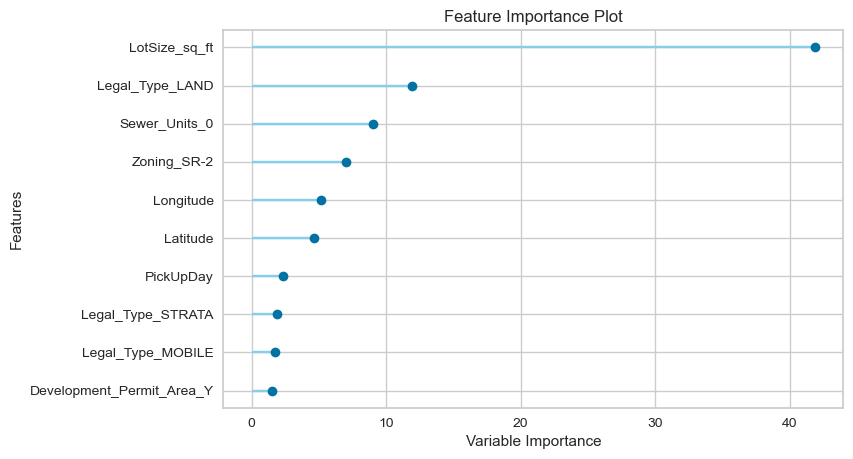

In [49]:
plot_model(catboost, plot='feature')

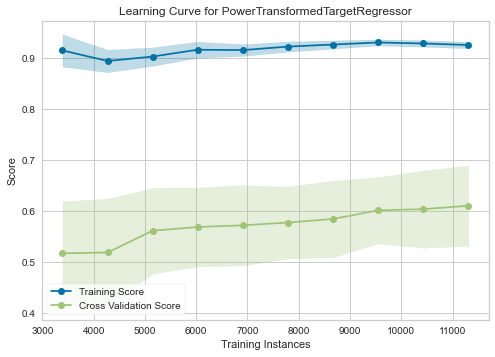

In [51]:
plot_model(catboost, plot='learning')

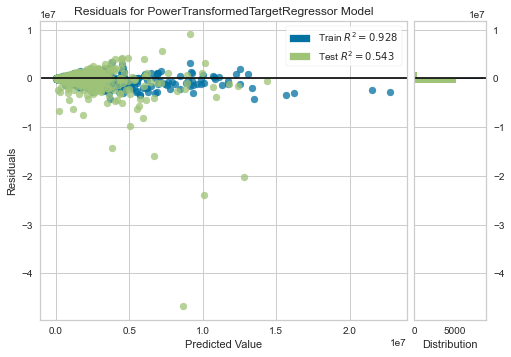

In [50]:
plot_model(catboost, plot='residuals')

In [51]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,139079.1290,285556147683.5836,534374.5388,0.7371,0.5399,388.5668
1,142368.7905,260639215968.2111,510528.3694,0.7260,0.2685,0.1824
2,140142.7931,327495062214.3239,572271.8429,0.6026,0.3247,0.8538
3,129033.0980,219730772283.5054,468754.4904,0.7147,0.2475,0.1743
4,137951.5017,163952431553.6060,404910.3994,0.7786,0.3246,0.6112
5,95667.7888,76650236917.5226,276857.7919,0.8562,0.1697,0.0947
6,133489.4850,247117940445.3083,497109.5860,0.7535,0.3886,102.3700
7,141033.1751,246038259494.6403,496022.4385,0.7063,0.6009,475.7135
8,142108.7907,348643943017.0133,590460.7887,0.6899,0.4826,234.7419
9,140406.3167,482546764453.5637,694655.8604,0.5533,0.2511,0.1498


In [54]:
import scipy.stats

params = {'iterations': [250,500],
          'learning_rate': scipy.stats.uniform(0.01, 0.3), 
          'l2_leaf_reg': scipy.stats.reciprocal(a=1e-2, b=1e1),
          'max_depth': scipy.stats.randint(3, 10),
          'one_hot_max_size': [30],
          'border_count': [10,20,50,100,200]
         }

In [55]:
catboost_tuned = tune_model(catboost, custom_grid=params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,132177.5651,205095267234.6392,452874.4497,0.8112,0.5403,384.6393
1,145035.3796,276950900050.9918,526261.2470,0.7088,0.2745,0.1926
2,134655.9764,289499560015.9703,538051.6332,0.6487,0.3123,0.5186
3,129058.9117,220418955194.0441,469487.9713,0.7138,0.2489,0.1661
4,140677.8886,168680273024.3018,410707.0404,0.7722,0.3224,0.5706
5,100162.5200,89416621854.1514,299026.1224,0.8323,0.1711,0.0957
6,128280.1354,216723996807.8422,465536.2465,0.7838,0.3868,99.5519
7,142198.5079,280243462108.3250,529380.2623,0.6655,0.6016,474.8557
8,138373.0193,325695893184.9944,570697.7249,0.7103,0.4815,236.9294
9,139186.5439,402915994229.2848,634756.6417,0.6270,0.2484,0.1441


In [56]:
plot_model(catboost_tuned, plot='parameter')

,Parameters
loss_function,RMSE
iterations,250
learning_rate,0.24310133166693412
l2_leaf_reg,1.9860393569788302
border_count,200
verbose,False
one_hot_max_size,30
task_type,CPU
max_depth,6
random_state,123


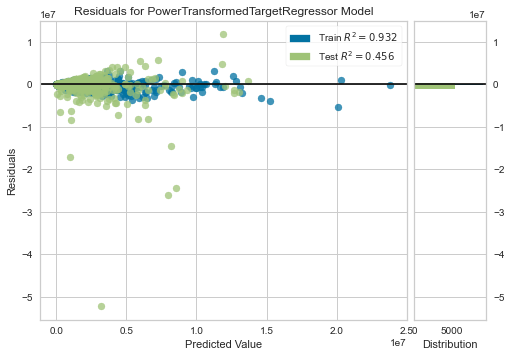

In [57]:
plot_model(catboost_tuned, plot='residuals')

In [58]:
predict_model(catboost_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,160833.9953,1039467907900.5295,1019542.9897,0.4559,0.3798,103.6035


,Sewer_StartYear,Water_StartYear,PickUpDay,Latitude,Longitude,LotSize_sq_ft,ALR_NOT IN ALR,Board_of_Variance_N,Board_of_Variance_R,Burning_NOT ALLOWED,...,Zoning_RM-1,Zoning_RM-2,Zoning_RM-3,Zoning_RM-3A,Zoning_RM-4,Zoning_SR-1,Zoning_SR-2,Zoning_SR-3,Total_Gross_Property_Assessment,Label
0,-0.370744,-0.373333,3,1.370801,-0.304251,-0.403657,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,763000.0,7.790408e+05
1,-0.370744,-0.373333,1,0.724418,-0.571238,1.849277,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2370000.0,2.500522e+06
2,-0.370744,-0.373333,4,-0.359147,0.282956,-1.264764,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,392000.0,4.813321e+05
3,-0.370744,-0.373333,4,-1.021574,-1.306084,0.240394,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,955000.0,9.350596e+05
4,-0.370744,-0.373333,4,-1.642460,-0.836974,2.099302,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1552000.0,2.526241e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5664,2.787635,-0.373333,1,1.010496,-1.504359,1.883832,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1441000.0,1.308083e+06
5665,-0.370744,-0.373333,2,-1.187410,1.509460,-0.807912,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476900.0,4.310316e+05
5666,-0.370744,-0.373333,4,-0.444543,0.455951,0.115041,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1072000.0,1.024459e+06
5667,2.788848,3.002603,1,0.452011,-1.427114,-0.560856,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,957000.0,9.929207e+05


In [59]:
catboost_final = finalize_model(catboost_tuned)

In [60]:
unseen_predictions = predict_model(catboost_final, data=data_unseen)

In [63]:
unseen_predictions.head().style \
                        .format({'Total_Gross_Property_Assessment': "{:,.0f}", 'Label': '{:,.0f}'})

,ALR,Board_of_Variance,Burning,Development_Permit_Area,Heritage,Heritage_Conserve_Area,Recycling_StartYear,Recycling_Units_BlueBox,Recycling_Units_Toter,Secondary_Suite_Details,Secondary_Suite_ToL_Services,Sewer_StartYear,Sewer_Units,Toters_on_Site,Trees_of_Interest,Water_StartYear,Water_Units,PickUpDay,Residential_Solid_WasteService,Street,Postal_Code,Community,Legal_Type,Zoning,Latitude,Longitude,LotSize_sq_ft,Total_Gross_Property_Assessment,Label
0,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,1,0,N,1996,1,1,Recycling_Only,WILLOUGHBY WAY,V2Y,Willoughby,STRATA,RM-2,49.122389,-122.669198,0.000000,"508,000","438,952"
1,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,1,0,N,1996,1,1,Recycling_Only,WILLOUGHBY WAY,V2Y,Willoughby,STRATA,RM-2,49.122398,-122.669561,0.000000,"529,000","438,952"
2,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,1,0,N,1996,1,1,Recycling_Only,WILLOUGHBY WAY,V2Y,Willoughby,STRATA,RM-2,49.122112,-122.668918,0.000000,"495,000","438,952"
3,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,1,0,N,1996,1,1,Recycling_Only,64 AVE,V2Y,Willoughby,STRATA,RM-2,49.120004,-122.675279,0.000000,"422,000","435,412"
4,NOT IN ALR,N,NOT ALLOWED,Y,N,N,1996,1,0,No_Data,No_Data,1996,1,0,N,1996,1,1,Recycling_Only,64 AVE,V2Y,Willoughby,STRATA,RM-2,49.119276,-122.675142,0.000000,"433,000","435,412"


In [62]:
from pycaret.utils import check_metric

check_metric(unseen_predictions['Total_Gross_Property_Assessment'], unseen_predictions.Label, 'R2')

0.7705